In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# from ydata_profiling import ProfileReport

from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
# perform basic EDA using the Python library YData Profiling
# report = ProfileReport(df, title="EDA Report", explorative=True)
# report.to_file("eda_report.html")

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# change data type in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# unique values by columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
['Female' 'Male']
Column: SeniorCitizen
[0 1]
Column: Partner
['Yes' 'No']
Column: Dependents
['No' 'Yes']
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
['No' 'Yes']
Column: MultipleLines
['No phone service' 'No' 'Yes']
Column: InternetService
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Column: OnlineBackup
['Yes' 'No' 'No internet service']
Column: DeviceProtection
['No' 'Yes' 'No internet service']
Column: TechSupport
['No' 'Yes' 'No internet service']
Column: StreamingTV
['No' 'Yes' 'No internet service']
Column: StreamingMovies
['No' 'Yes' 'No internet service']
Column: Contract
['Month-to-month' 'One year' 'Two ye

In [7]:
# let's make the SeniorCitizen variable categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

In [8]:
# find missing values by columns
print("Missing values by columns:")
print(df.isnull().sum())

Missing values by columns:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [9]:
# take a look at the rows with missing values
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
# to solve the problem of missing values in the TotalCharges column, 
# I decided to delete rows with missing values, 
# since there are only 11 of them (< 0.1%)
df = df.dropna()

In [11]:
# delete the customerID column
df.drop('customerID', axis=1, inplace=True)

In [12]:
# the number of duplicates
print(df.duplicated().sum())

22


In [13]:
# delete duplicates
df.drop_duplicates(inplace=True)
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [14]:
# the target variable 'Churn' is imbalanced (73.51% No, 26.49% Yes), needs to be balanced
print((df['Churn'].value_counts(normalize=True) * 100).round(2))

Churn
No     73.51
Yes    26.49
Name: proportion, dtype: float64


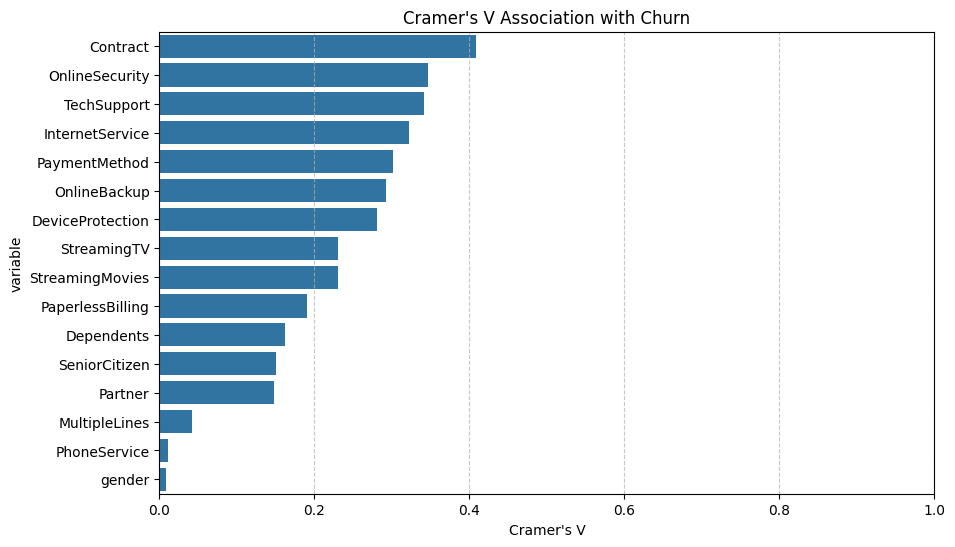

Variables with Cramer's V > 0.2: ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']


In [15]:
# CATEGORICAL VARIABLES
categorical_variables = df.select_dtypes(include='object').columns.drop('Churn')

#Cramer's V
def cramers_v(contingency_table):
    chi2, p, dof, exp = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1 
    cramers_v = np.sqrt(chi2 / (n * min_dim)).round(3)
    return cramers_v

results = []

for col in categorical_variables:
    cv = cramers_v(pd.crosstab(df[col], df['Churn']))
    results.append({'variable': col, 'cramers_v': cv})

cramers_df = pd.DataFrame(results).sort_values('cramers_v', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=cramers_df, x='cramers_v', y='variable')

plt.title("Cramer's V Association with Churn")
plt.xlabel("Cramer's V")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(f"Variables with Cramer's V > 0.2: {cramers_df[cramers_df['cramers_v'] > 0.2]['variable'].tolist()}")

In [16]:
# Weak association (Cramer's V <= 0.2):
# Variables such as Gender, PhoneService, MultipleLines, SeniorCitizen, Partner, Dependents and PaperlessBilling
# show weak association with churn. These variables have some predictive value.

# Moderate association (0.2 < Cramer's V <= 0.6):
# Variables such as InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, 
# StreamingMovies, Contract and PaymentMethod show moderate association with churn. 
# These variables are highly informative and likely play a significant role in explaining customer churn behavior.

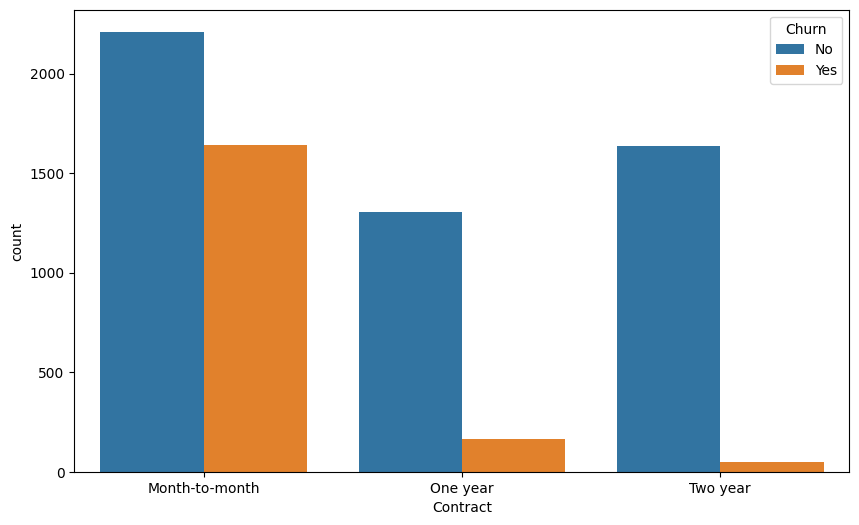

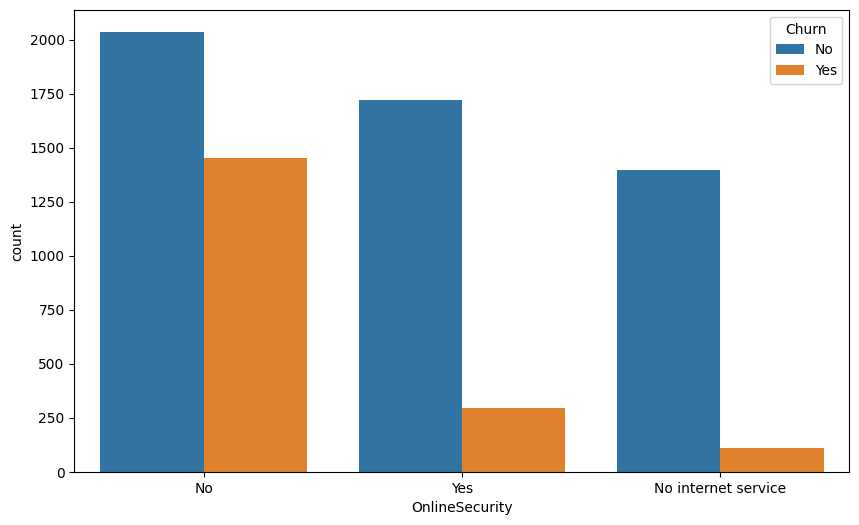

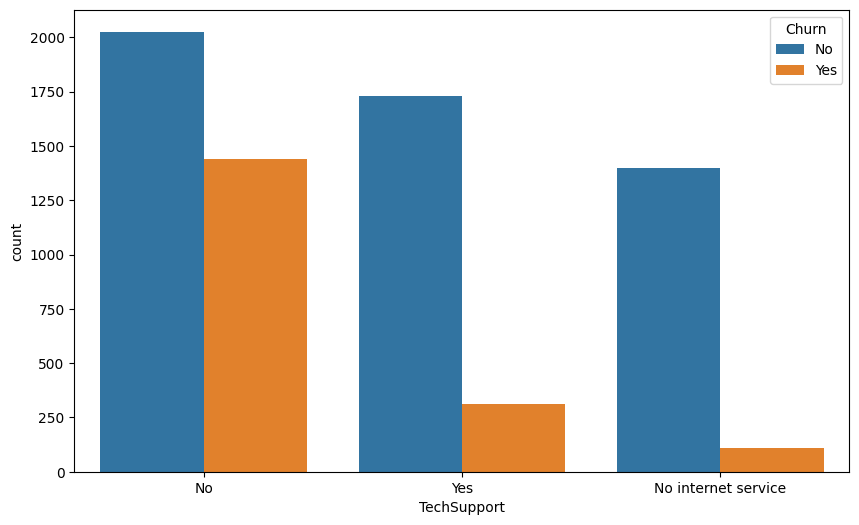

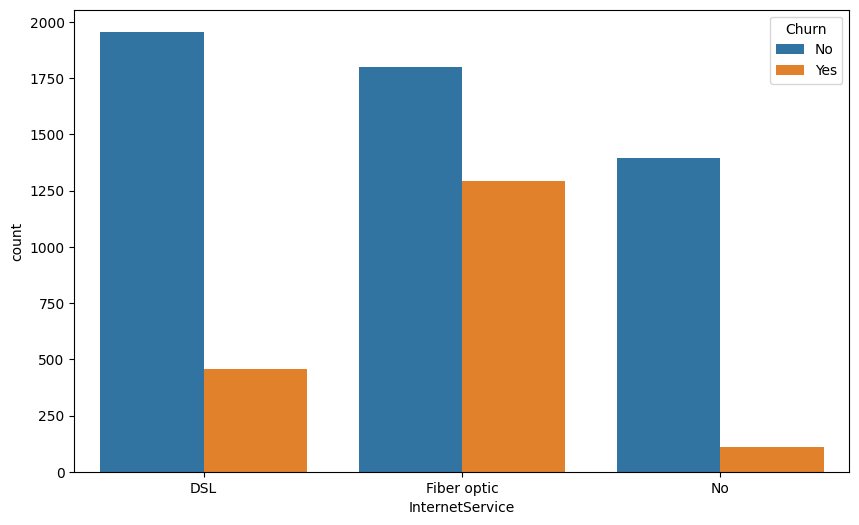

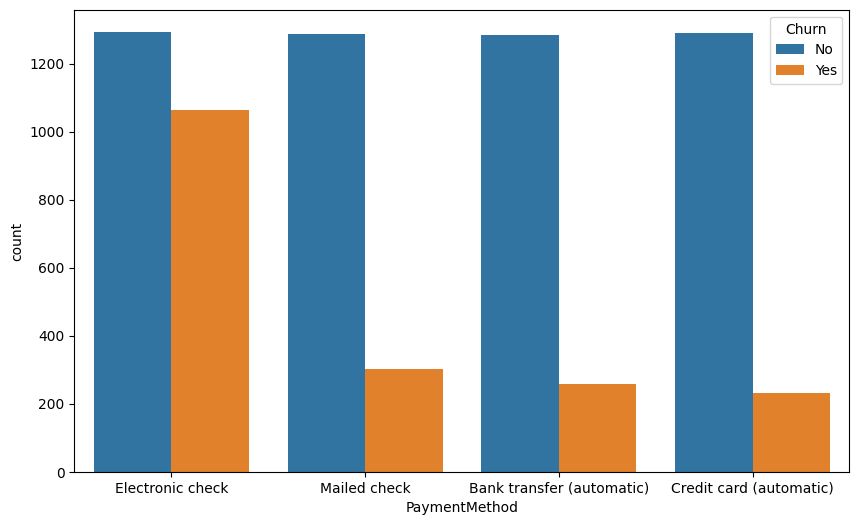

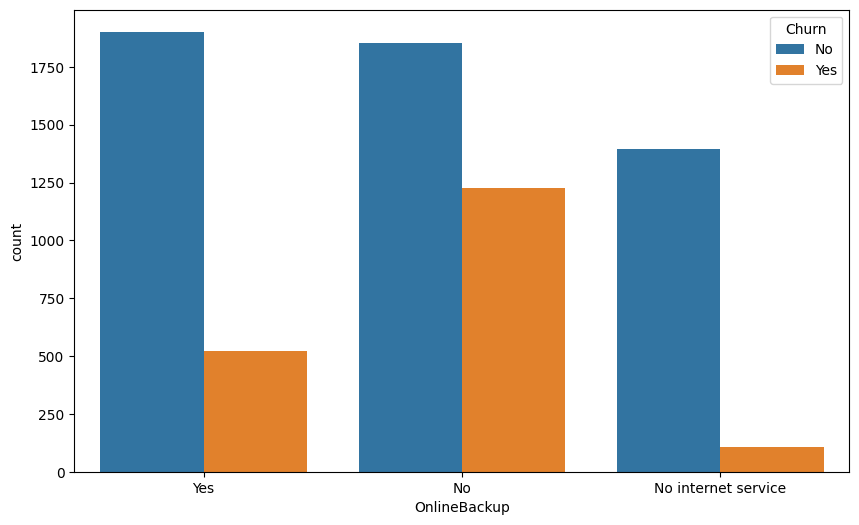

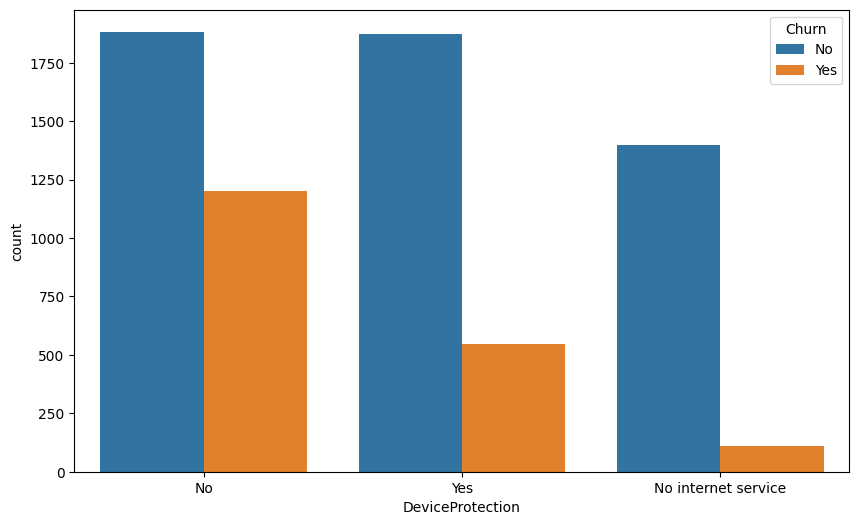

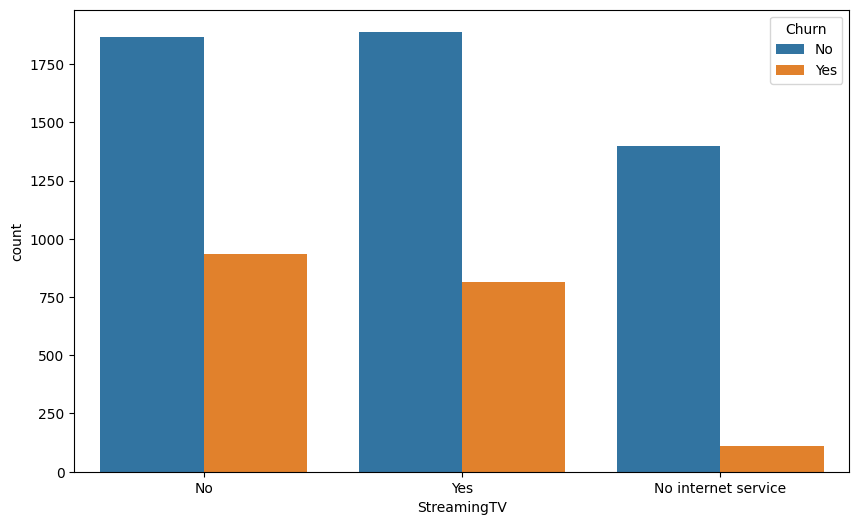

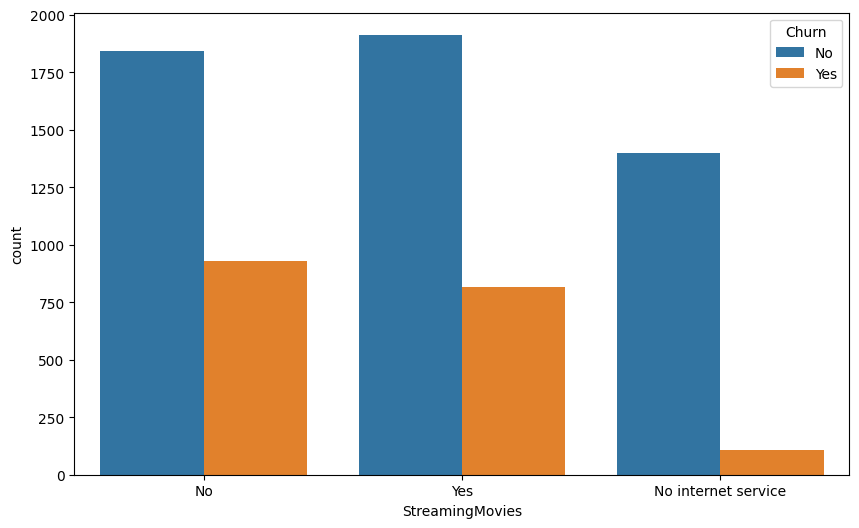

In [17]:
# visualize the distribution of churned vs non-churned customers with strong association
for i, col in enumerate(['Contract', 'OnlineSecurity', 'TechSupport', 
                        'InternetService', 'PaymentMethod', 'OnlineBackup', 
                        'DeviceProtection', 'StreamingTV', 'StreamingMovies']):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.show()

In [18]:
# customers with fiber optic internet service, 
# customers without online security,
# customers without online backup, 
# customers without device protection, 
# customers without technical support, 
# customers with a month-to-month contract 
# and customers with an electronic check payment method are most likely to churn.
# StreamingTV' and 'StreamingMovies' are not as indicative as the previous ones, the churn rate is roughly the same.

In [19]:
# NON-CATEGORICAL VARIABLES
non_categorical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[non_categorical_variables].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


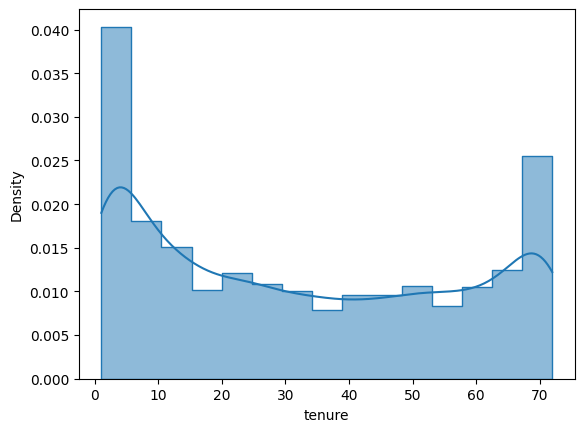

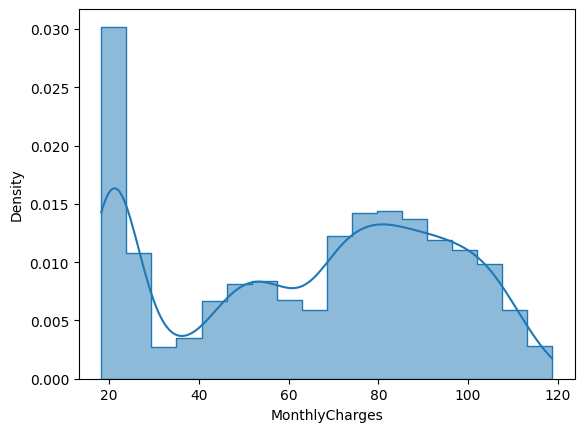

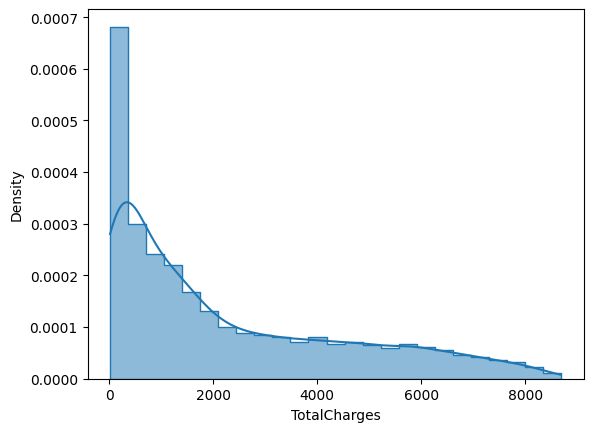

In [20]:
# graphics for non-categorical variables
for i, col in enumerate(non_categorical_variables):
    sns.histplot(data=df, x=col, kde=True, element='step', stat='density')
    plt.show()

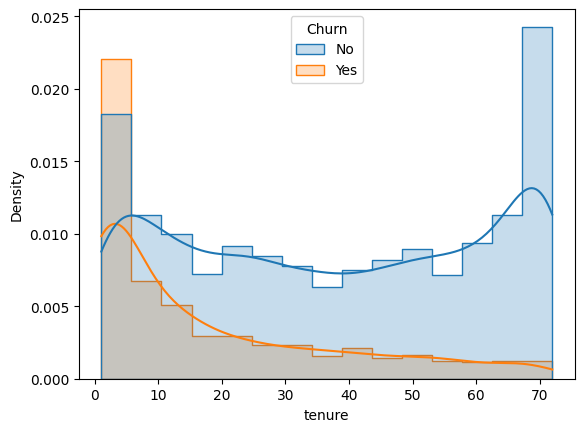

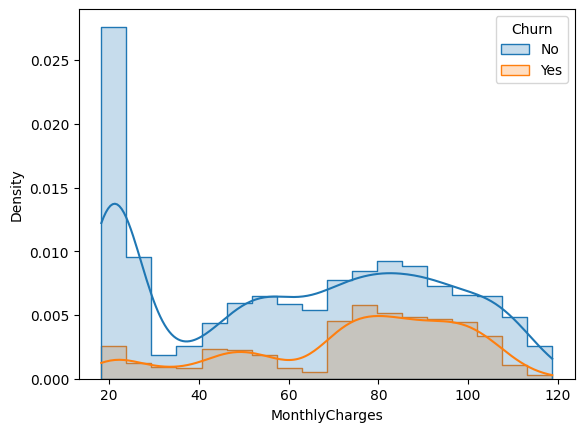

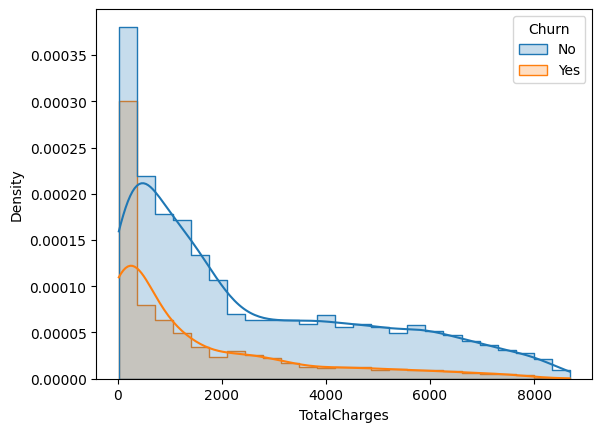

In [21]:
# with Churn
for i, col in enumerate(non_categorical_variables):
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step', stat='density')
    plt.show()

In [22]:
# customers with lower tenure,
# customers with higher moutnly charges and
# customers with lower total charges are most like to churn
# the variable TotalCharges is close to exponential, so we apply log transform to reduce skew and improve model performance.

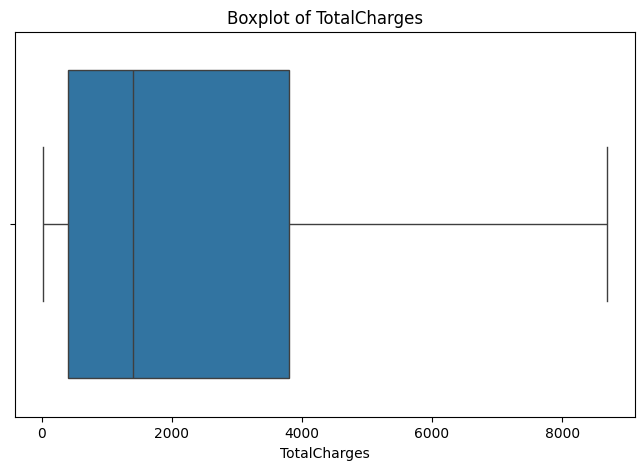

In [23]:
# boxplot of TotalCharges
plt.figure(figsize=(8,5))
sns.boxplot(x=df['TotalCharges'])
plt.title("Boxplot of TotalCharges")
plt.show()

In [24]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [25]:
df.to_csv('prepared_data_to_ml.csv', index=False)

In [26]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=categorical_variables, drop_first=True)

In [27]:
df.head(10)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
5,8,99.65,820.50,1,False,False,False,False,True,False,...,False,True,False,True,False,False,True,False,True,False
6,22,89.10,1949.40,0,True,False,False,True,True,False,...,False,True,False,False,False,False,True,True,False,False
7,10,29.75,301.90,0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
8,28,104.80,3046.05,1,False,False,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
9,62,56.15,3487.95,0,True,False,False,True,True,False,...,False,False,False,False,True,False,False,False,False,False


<Axes: >

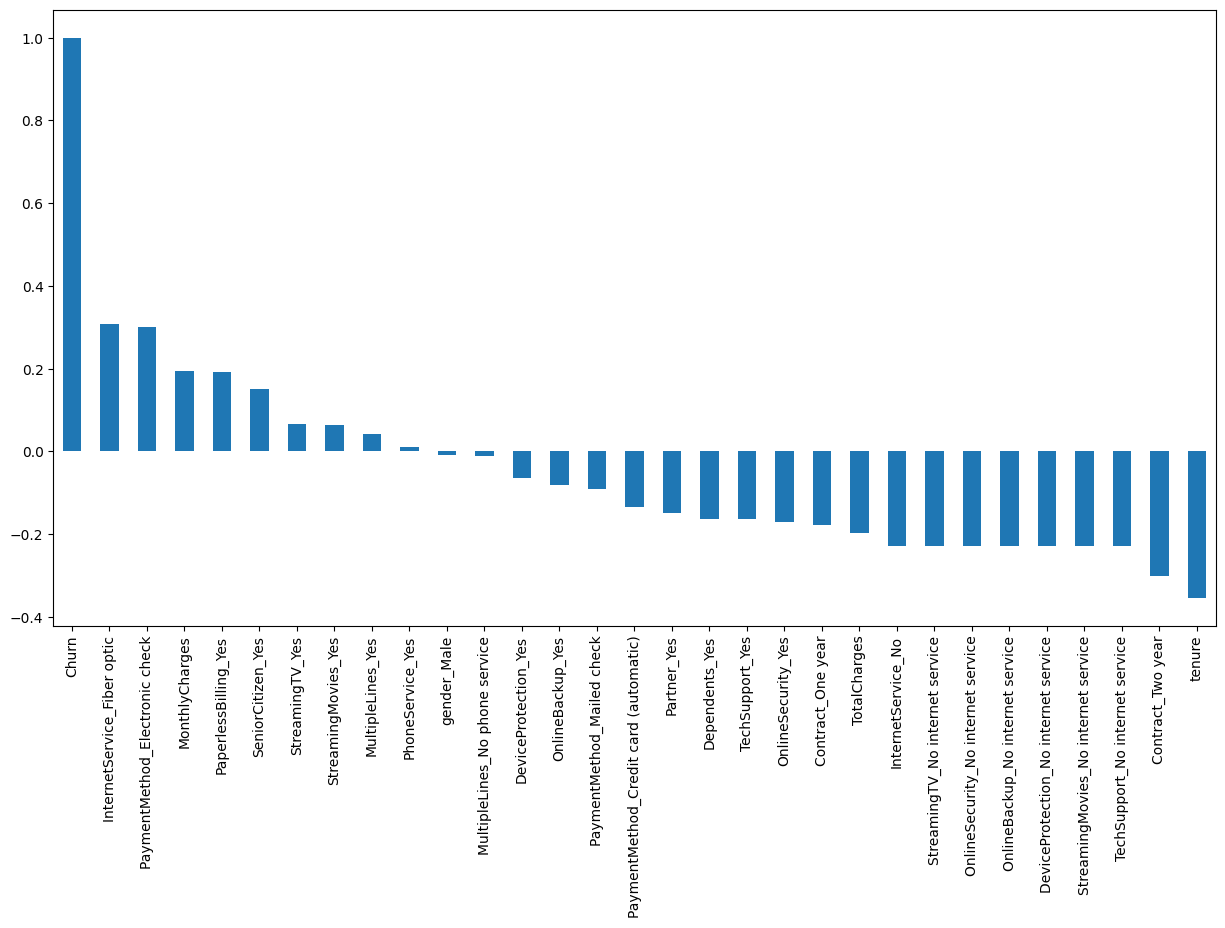

In [28]:
# correlation analysis
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [29]:
# CONCLUSIONS:
# 1. The most significant predictors of churn are:
# - Contract
# - Online security
# - Technical support
# - Internet service
# - Payment method
# - Online backup
# - Device protection
# - Streaming TV
# - Streaming movies
# 2. The target variable Churn is unbalanced, with a higher proportion of customers not churning.
# 3. The variables Term, Monthly payments, and Total payments also show a significant relationship with churn,
# indicating a higher probability of churn for customers with shorter term, higher monthly payments, and lower total payments.
# None of these variables are normally distributed, so min-max scaling is appropriate.
# The TotalCharges variable is close to exponential, so we apply a logarithmic transformation to reduce skew and improve model performance.